In [1]:
import numpy as np
import pandas as pd
from functions import *
from schemes import *
from plot import * 
from Kepler import *
from adaptive import * 

%matplotlib inline

In [2]:
# gravity
G = 1

# mass ratio & eccentricity 
q = 1.0 # q = m2 / m1
e = 0.5

m1 = 1 # central mass
m2 = q # orbiting mass
mu = G * (m1 + m2) 

# position
r1 = np.array([0,0.0,0.0], dtype="float64")
r2 = np.array([1,0.0,0.0], dtype="float64")

# velocity 
v1 = np.array([0,0.0,0], dtype="float64")
v2 = np.array([0,np.sqrt((1 + q)*(1 + e)),0], dtype="float64")

# create initial vectors
r0s = np.array([r1,r2])
v0s = np.array([v1,v2])
masses = np.array([m1, m2])

In [3]:
T = 50
h = 0.01

In [4]:
def findh(h0, rs, vs):
    h = h0
    for i, ri in enumerate(rs):
        for j, rj in enumerate(rs):
            if i != j:
                r_mag = np.linalg.norm(ri - rj)
                v_mag = np.linalg.norm(vs[i] - vs[j])
                h = min(h, r_mag / v_mag)
    return h

In [5]:
traj = run_scheme(LeapfrogStep, 0, T, h, r0s, v0s, G, masses)
t_traj, rs_traj, vs_traj, E_traj, am_traj, time = traj

r_mags = np.linalg.norm(rs_traj[:,0,:]-rs_traj[:,1,:], axis = 1)

hs = [findh(np.inf, rs_traj[i], vs_traj[i]) for i in range(len(rs_traj))]


In [6]:
av = np.mean(np.array(hs))
scaler = 0.01 / av
print(scaler)

0.003340420428243614


C:\Users\s2444261\AppData\Local\Temp\ipykernel_14460\1464071528.py:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  scatter = ax.scatter(t_traj, hs, c = r_mags, s = 1, cmap = plt.cm.get_cmap('viridis'), marker = 'o')
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


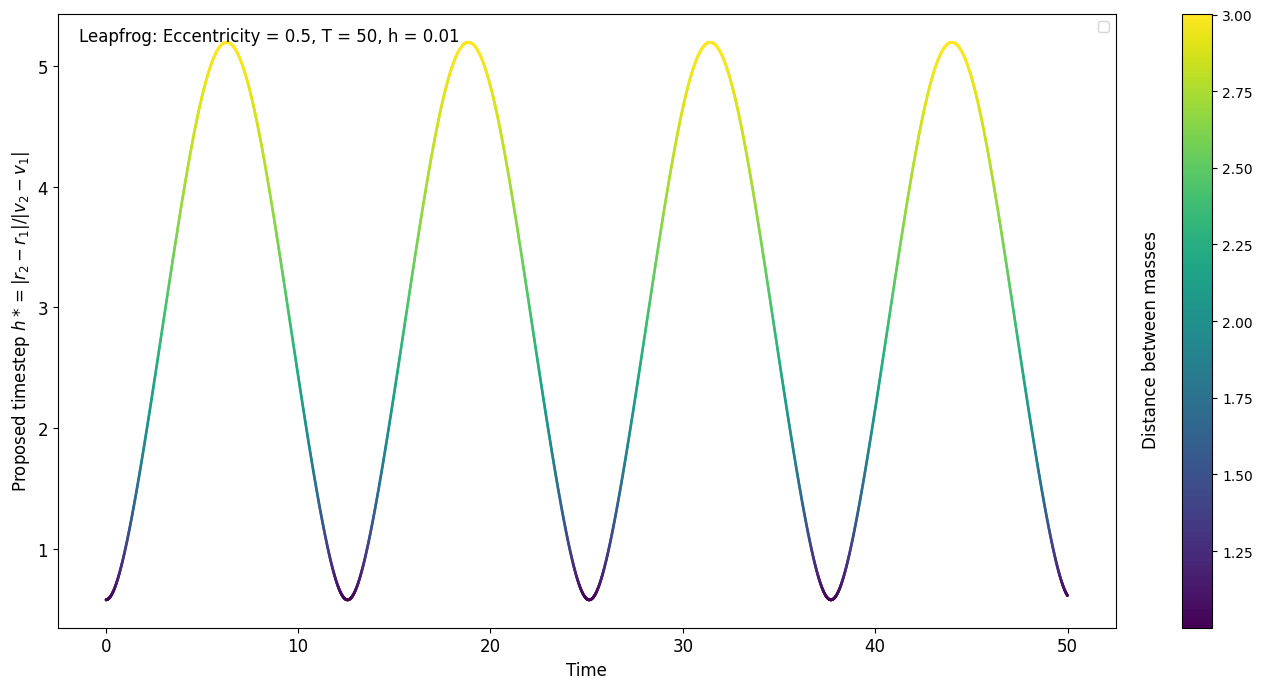

In [7]:
fig, ax = plt.subplots(1, 1, figsize=(14,7))

scatter = ax.scatter(t_traj, hs, c = r_mags, s = 1, cmap = plt.cm.get_cmap('viridis'), marker = 'o')
colorbar = plt.colorbar(scatter, ax=ax)
# colorbar.set_label('Distance between masses', rotation = 270, x = 0.8)
ax.legend()

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
ax.set_ylabel(r'Proposed timestep $h* = |r_2 - r_1| / |v_2 - v_1|$', fontsize = 12)
ax.set_xlabel('Time', fontsize = 12)

ax.text(0.02, 0.98, f'Leapfrog: Eccentricity = {e}, T = {T}, h = {h}', transform=ax.transAxes, 
            va='top', fontsize = 12)
ax.text(1.025, 0.3, f'Distance between masses', transform=ax.transAxes, fontsize = 12, rotation = 90)
plt.tight_layout()

plt.savefig(f'Plots/Adaptive/Leapfrog Changing stepsize.pdf', format = 'pdf')


In [8]:
T = 50
traj = run_scheme(EulerStep, 0, T, h, r0s, v0s, G, masses)
t_traj, rs_traj, vs_traj, E_traj, am_traj, time = traj

r_mags = np.linalg.norm(rs_traj[:,0,:]-rs_traj[:,1,:], axis = 1)

hs = [findh(np.inf, rs_traj[i], vs_traj[i]) for i in range(len(rs_traj))]

In [9]:
print(np.mean(np.array(hs)))

4.792046837988958


C:\Users\s2444261\AppData\Local\Temp\ipykernel_14460\2283944175.py:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  scatter = ax.scatter(t_traj, hs, c = r_mags, s = 1, cmap = plt.cm.get_cmap('viridis'), marker = 'o')
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


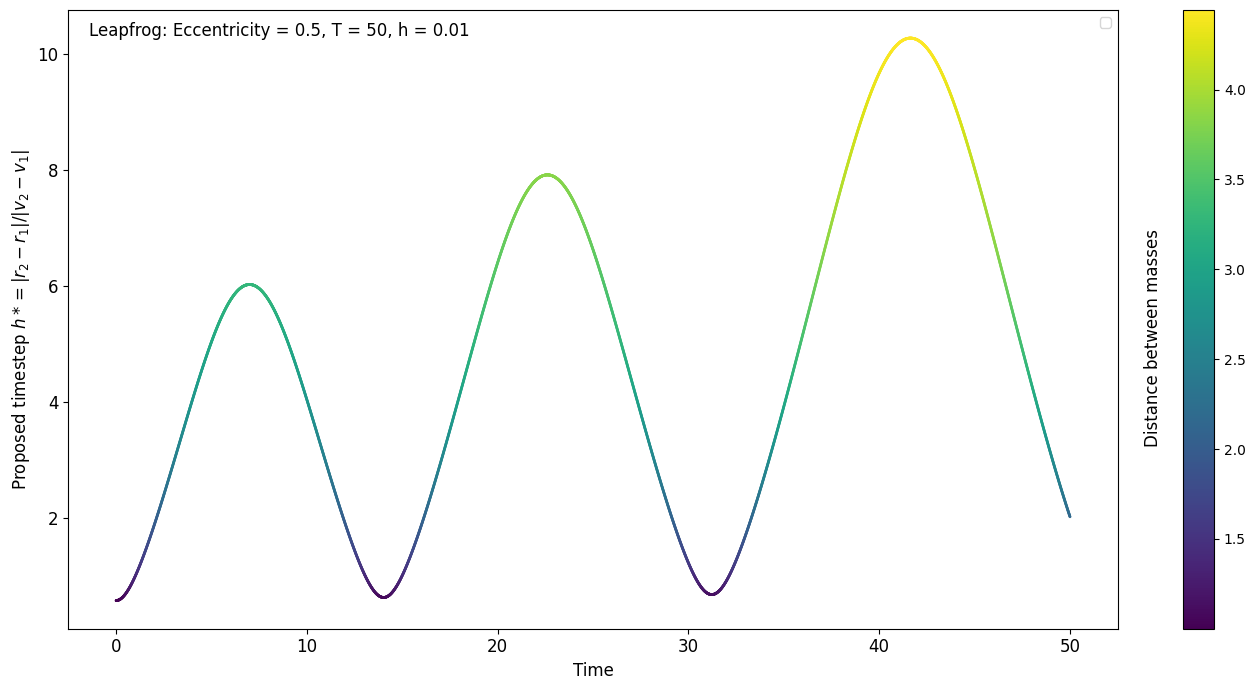

In [10]:
fig, ax = plt.subplots(1, 1, figsize=(14,7))

scatter = ax.scatter(t_traj, hs, c = r_mags, s = 1, cmap = plt.cm.get_cmap('viridis'), marker = 'o')
colorbar = plt.colorbar(scatter, ax=ax)
# colorbar.set_label('Distance between masses', rotation = 270, x = 0.8)
ax.legend()

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
ax.set_ylabel(r'Proposed timestep $h* = |r_2 - r_1| / |v_2 - v_1|$', fontsize = 12)
ax.set_xlabel('Time', fontsize = 12)

ax.text(0.02, 0.98, f'Leapfrog: Eccentricity = {e}, T = {T}, h = {h}', transform=ax.transAxes, 
            va='top', fontsize = 12)
ax.text(1.025, 0.3, f'Distance between masses', transform=ax.transAxes, fontsize = 12, rotation = 90)
plt.tight_layout()

plt.savefig(f'Plots/Adaptive/Euler Changing stepsize.pdf', format = 'pdf')

In [11]:
# gravity
G = 1

# mass ratio & eccentricity 
q = 1.0 # q = m2 / m1
e = 0.5

m1 = 1 # central mass
m2 = q # orbiting mass
mu = G * (m1 + m2) 

# position
r1 = np.array([0,0.0,0.0], dtype="float64")
r2 = np.array([1,0.0,0.0], dtype="float64")

# velocity 
v1 = np.array([0,0.0,0], dtype="float64")
v2 = np.array([0,np.sqrt((1 + q)*(1 + e)),0], dtype="float64")

# create initial vectors
r0s = np.array([r1,r2])
v0s = np.array([v1,v2])
masses = np.array([m1, m2])

T = 50 
h0 = 0.01

In [12]:
adapt_traj = run_adaptive(EulerStep, 0, T, h0, r0s, v0s, G, masses, scaleh = 0.01)
traj = run_scheme(EulerStep, 0, T, h0, r0s, v0s, G, masses)

t_adapt = adapt_traj[0]
t_traj = traj[0]

E_adapt = adapt_traj[3]
E_traj = traj[3]

rel_E_adapt = RelativeEnergy(E_adapt)
rel_E_traj = RelativeEnergy(E_traj)

hs = [t_adapt[i + 1] - t_adapt[i] for i in range(len(t_adapt)-1)]

In [13]:
print(np.mean(np.array(hs)))

0.026825305547631427


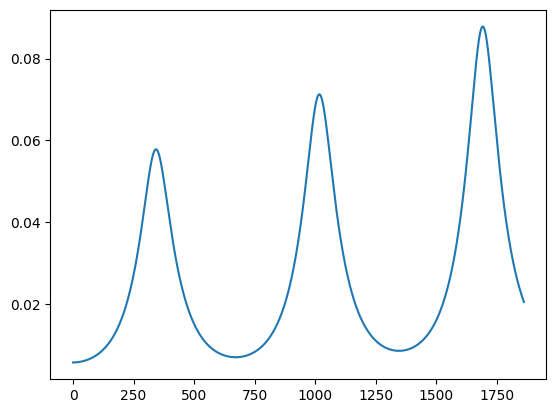

In [14]:
plt.plot(hs)

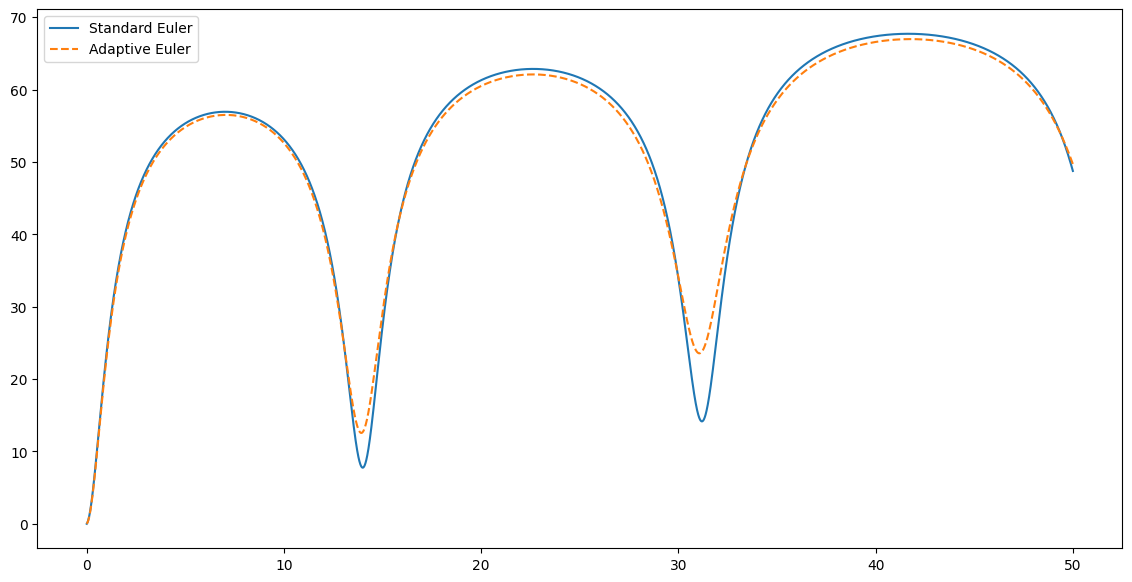

In [15]:
fig, ax = plt.subplots(1, 1, figsize = (14, 7))
ax.plot(t_traj, rel_E_traj, label = 'Standard Euler')
ax.plot(t_adapt, rel_E_adapt, label = 'Adaptive Euler', linestyle = '--')
ax.legend()

In [16]:
# gravity
G = 1

# mass ratio & eccentricity 
q = 1.0 # q = m2 / m1
e = 0.0

m1 = 1 # central mass
m2 = q # orbiting mass
mu = G * (m1 + m2) 

# position
r1 = np.array([0,0.0,0.0], dtype="float64")
r2 = np.array([1,0.0,0.0], dtype="float64")

# velocity 
v1 = np.array([0,0.0,0], dtype="float64")
v2 = np.array([0,np.sqrt((1 + q)*(1 + e)),0], dtype="float64")

# create initial vectors
r0s = np.array([r1,r2])
v0s = np.array([v1,v2])
masses = np.array([m1, m2])

T = 50 
h0 = 0.01

In [17]:
schemes = [EulerStep, EulerCromerStep, LeapfrogStep, RK4Step, PEFRLStep]
names = ['Explicit Euler', 'Symplectic Euler', 'Leapfrog', 'RK4', 'Forest-Ruth']

std_Es = []
adapt_Es = []
std_ts = []
adapt_ts = []
all_hs = []
for scheme in schemes:
    adapt_traj = run_adaptive(scheme, 0, T, h0, r0s, v0s, G, masses, scaleh = 0.01)
    traj = run_scheme(scheme, 0, T, h0, r0s, v0s, G, masses)

    t_adapt = adapt_traj[0]
    t_traj = traj[0]

    std_ts.append(t_traj)
    adapt_ts.append(t_adapt)

    E_adapt = adapt_traj[3]
    E_traj = traj[3]

    rel_E_adapt = RelativeEnergy(E_adapt)
    rel_E_traj = RelativeEnergy(E_traj)

    std_Es.append(rel_E_traj)
    adapt_Es.append(rel_E_adapt)

    hs = [t_adapt[i + 1] - t_adapt[i] for i in range(len(t_adapt)-1)]
    all_hs.append(hs)

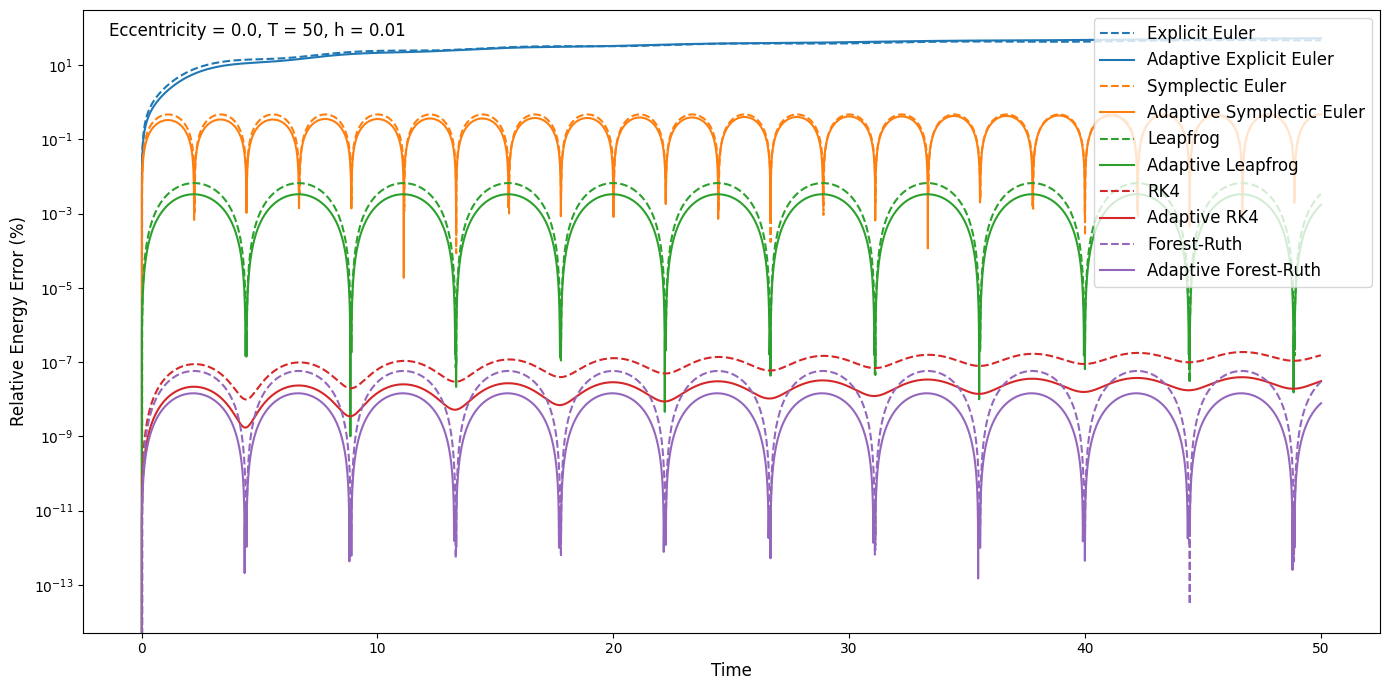

In [18]:
cols = [
    "#1f77b4",  # blue
    "#ff7f0e",  # orange
    "#2ca02c",  # green
    "#d62728",  # red
    "#9467bd",  # purple
    "#8c564b",  # brown
    "#e377c2",  # pink
    "#7f7f7f",  # gray
    "#bcbd22",  # yellow
    "#17becf"   # cyan
]

fig, ax = plt.subplots(1,1, figsize = (14,7))

for i, scheme in enumerate(schemes):

    std_E = std_Es[i]
    adapt_E = adapt_Es[i]
    t_std = std_ts[i]
    t_adapt = adapt_ts[i]
    ax.plot(t_std, std_E, label = names[i], linestyle = 'dashed', color = cols[i])
    ax.plot(t_adapt, adapt_E, label = f'Adaptive {names[i]}', linestyle = 'solid', color = cols[i])

ax.text(0.02, 0.98, f'Eccentricity = {e}, T = {T}, h = {h}', transform=ax.transAxes, 
            va='top', fontsize = 12)
    
ax.set_yscale('log')
ax.set_xlabel('Time', fontsize = 12)
ax.set_ylabel('Relative Energy Error (%)', fontsize = 12)
plt.legend(loc = 'upper right', fontsize=12)
plt.tight_layout()
plt.savefig(f'Plots/Adaptive/Adaptive Energy Comparison, Eccentricity={e}.pdf', format = 'pdf')

In [19]:
# for i, scheme in enumerate(schemes):
#     fig, ax = plt.subplots(1,1, figsize = (14,7))

#     std_E = std_Es[i]
#     adapt_E = adapt_Es[i]
#     t_std = std_ts[i]
#     t_adapt = adapt_ts[i]
#     ax.plot(t_std, std_E, label = names[i], linestyle = 'dashed', color = 'navy')
#     ax.plot(t_adapt, adapt_E, label = f'Adaptive {names[i]}', linestyle = 'solid', color = 'navy')

#     ax.text(0.02, 0.98, f'Eccentricity = {e}, T = {T}, h = {h}', transform=ax.transAxes, 
#                 va='top', fontsize = 12)
        
#     ax.set_yscale('log')
#     ax.set_xlabel('Time', fontsize = 12)
#     ax.set_ylabel('(log) Relative Energy Error (%)', fontsize = 12)
#     plt.legend(loc = 'upper right', fontsize=12)
#     plt.tight_layout()
#     plt.savefig(f'Plots/Adaptive/Adaptive {names[i]} Energy Comparison.pdf', format = 'pdf')

In [20]:
# gravity
G = 1

# mass ratio & eccentricity 
q = 1.0 # q = m2 / m1
e = 0.5

m1 = 1 # central mass
m2 = q # orbiting mass
mu = G * (m1 + m2) 

# position
r1 = np.array([0,0.0,0.0], dtype="float64")
r2 = np.array([1,0.0,0.0], dtype="float64")

# velocity 
v1 = np.array([0,0.0,0], dtype="float64")
v2 = np.array([0,np.sqrt((1 + q)*(1 + e)),0], dtype="float64")

# create initial vectors
r0s = np.array([r1,r2])
v0s = np.array([v1,v2])
masses = np.array([m1, m2])

T = 50 
h0 = 0.01

schemes = [EulerStep, EulerCromerStep, LeapfrogStep, RK4Step, PEFRLStep]
names = ['Explicit Euler', 'Symplectic Euler', 'Leapfrog', 'RK4', 'Forest-Ruth']
scalers = [0.01, 0.01, 0.01, 0.3, 1.0]
std_Es = []
adapt_Es = []
std_ts = []
adapt_ts = []
all_hs = []
for scheme in schemes:
    adapt_traj = run_adaptive(scheme, 0, T, h0, r0s, v0s, G, masses, scaleh = scalers[i])
    traj = run_scheme(scheme, 0, T, h0, r0s, v0s, G, masses)

    t_adapt = adapt_traj[0]
    t_traj = traj[0]

    std_ts.append(t_traj)
    adapt_ts.append(t_adapt)

    E_adapt = adapt_traj[3]
    E_traj = traj[3]

    rel_E_adapt = RelativeEnergy(E_adapt)
    rel_E_traj = RelativeEnergy(E_traj)

    std_Es.append(rel_E_traj)
    adapt_Es.append(rel_E_adapt)

    hs = [t_adapt[i + 1] - t_adapt[i] for i in range(len(t_adapt)-1)]
    all_hs.append(hs)

c:\Users\s2444261\Documents\Diss\Dissertation\functions.py:27: RuntimeWarning: divide by zero encountered in divide
  Fij = G * masses[i] * masses[j] * (rj - ri) / ((np.linalg.norm(rj - ri))** 3) # force of j-th mass on i-th mass
c:\Users\s2444261\Documents\Diss\Dissertation\functions.py:27: RuntimeWarning: invalid value encountered in divide
  Fij = G * masses[i] * masses[j] * (rj - ri) / ((np.linalg.norm(rj - ri))** 3) # force of j-th mass on i-th mass
c:\Users\s2444261\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\core\numeric.py:1655: RuntimeWarning: invalid value encountered in subtract
  cp2 -= tmp


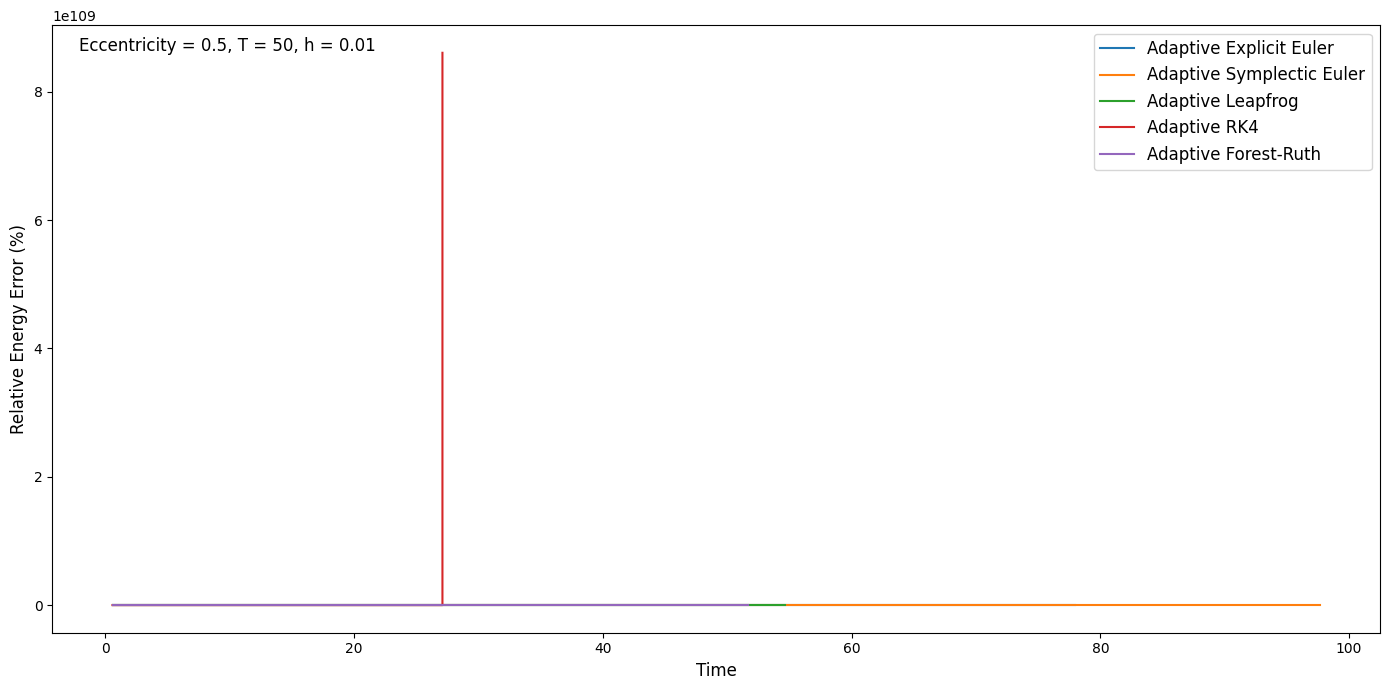

In [21]:
cols = [
    "#1f77b4",  # blue
    "#ff7f0e",  # orange
    "#2ca02c",  # green
    "#d62728",  # red
    "#9467bd",  # purple
    "#8c564b",  # brown
    "#e377c2",  # pink
    "#7f7f7f",  # gray
    "#bcbd22",  # yellow
    "#17becf"   # cyan
]

fig, ax = plt.subplots(1,1, figsize = (14,7))

for i, scheme in enumerate(schemes):

    std_E = std_Es[i]
    adapt_E = adapt_Es[i]
    t_std = std_ts[i]
    t_adapt = adapt_ts[i]
   # ax.plot(t_std, std_E, label = names[i], linestyle = 'dashed', color = cols[i])
    ax.plot(t_adapt, adapt_E, label = f'Adaptive {names[i]}', linestyle = 'solid', color = cols[i])

ax.text(0.02, 0.98, f'Eccentricity = {e}, T = {T}, h = {h}', transform=ax.transAxes, 
            va='top', fontsize = 12)
    
# ax.set_yscale('log')
ax.set_xlabel('Time', fontsize = 12)
ax.set_ylabel('Relative Energy Error (%)', fontsize = 12)
plt.legend(loc = 'upper right', fontsize=12)
plt.tight_layout()
plt.savefig(f'Plots/Adaptive/Adaptive Energy Comparison, Eccentricity={e}.pdf', format = 'pdf')

In [35]:
# gravity
G = 1

# mass ratio & eccentricity 
q = 1.0 # q = m2 / m1
e = 0.0

m1 = 1 # central mass
m2 = q # orbiting mass
mu = G * (m1 + m2) 

# position
r1 = np.array([0,0.0,0.0], dtype="float64")
r2 = np.array([1,0.0,0.0], dtype="float64")

# velocity 
v1 = np.array([0,0.0,0], dtype="float64")
v2 = np.array([0,np.sqrt((1 + q)*(1 + e)),0], dtype="float64")

# create initial vectors
r0s = np.array([r1,r2])
v0s = np.array([v1,v2])
masses = np.array([m1, m2])

T = 50

In [82]:
schemes = [EulerCromerStep, LeapfrogStep, RK4Step, PEFRLStep]
s0s = [0.002, 0.0025, 0.01, 0.01, 0.01]
names = ['Symplectic Euler', 'Leapfrog', 'RK4', 'Forest-Ruth', 'Scipy']
linestyles = ['solid', 'solid', 'solid', 'solid', 'solid', '--']

all_E_maxes = []
all_s_vals = []

for i, scheme in enumerate(schemes):
    s0 = s0s[i]
    s = s0
    E_maxes = []
    s_vals = []
    rel_E_traj = 0
    while rel_E_traj <= 2:
        traj = run_adaptive(scheme, 0, T, h, r0s, v0s, G, masses, scaleh = s)
        t_traj, rs_traj, vs_traj, E_traj, am_traj, time = traj
        rel_E_traj = np.max(RelativeEnergy(E_traj))
        print(rel_E_traj)
        E_maxes.append(rel_E_traj)
        s_vals.append(s)
        s += s0


    # E_maxes = np.array(E_maxes) - E_maxes[0]
    all_s_vals.append(s_vals)
    all_E_maxes.append(E_maxes)

0.0782926592637087
0.15897422848885615
0.25044024848732027
0.3537016739978414
0.47231519947833905
0.6111197280196756
0.7678661091969645
0.9447056710527526
1.1434825781869526
1.366237897479474
1.6141740900784245
1.8916618588994243
2.1990368886100056
0.00021786817538300705
0.0008353373987651519
0.0018755699860075294
0.0033334934550588225
0.00520849346570865
0.007500397807680768
0.010209426063565057
0.01333536213509559
0.016878345985706266
0.02083880657061061
0.025217022689992485
0.030011912348347693
0.03522486447546685
0.04085594907647782
0.04690519704166362
0.05336885398086482
0.06025997645187104
0.06756387338268914
0.07528872410785979
0.08343117711377183
0.09199407571672828
0.10097758506764484
0.11036977920119977
0.12019090815971101
0.13044018301375043
0.14109781142586825
0.15216752188556437
0.16370871523590355
0.175614475444398
0.18799344257758277
0.20071272755651787
0.2139443669170167
0.2275929823368838
0.24164495988743748
0.2561154416997884
0.2710135584694407
0.28633987096196367
0.3

s = 0.016116201931653
s = 0.17225917601156848
s = 0.3484490170519283
s = 0.9240957161352804


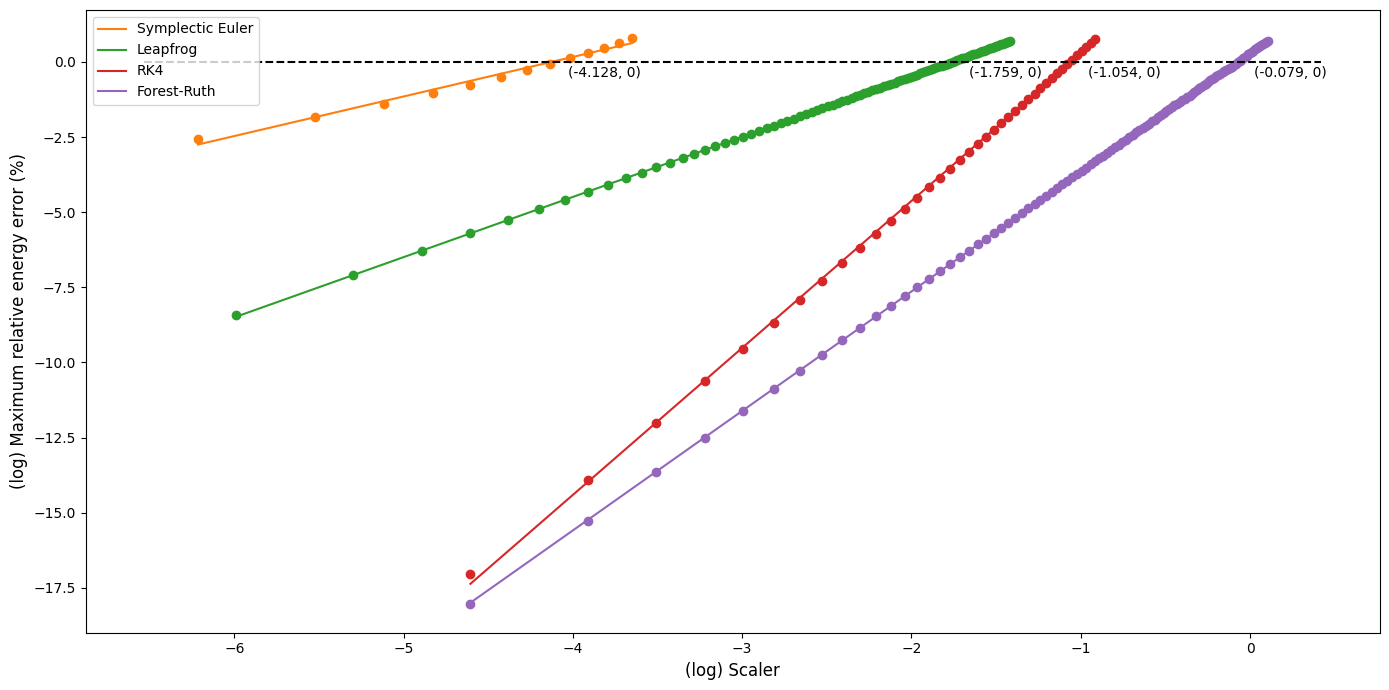

In [88]:
colours = [    "#ff7f0e",  # orange
    "#2ca02c",  # green
    "#d62728",  # red
    "#9467bd",  # purple 
    ]
fig, ax = plt.subplots(1,1, figsize = (14,7))
scales = []
for i, E_maxes in enumerate(all_E_maxes):
    s_vals = np.array(all_s_vals[i])
    a, b = np.polyfit(np.log(s_vals), np.log(E_maxes), 1)
    ax.scatter(np.log(s_vals), np.log(E_maxes), color = colours[i])
    ax.annotate(f'({np.round(-b / a, 3)}, {0})', xy = (-b/a, 0), xytext = (-b/a + .1, -.5))
    print(f's = {np.exp(-b / a)}')
    scales.append(np.exp(-b / a))
    ax.plot(np.log(s_vals), a * np.log(s_vals) + b, label = names[i], linestyle = linestyles[i], color = colours[i])

ax.hlines(np.log(1), ax.get_xlim()[0], ax.get_xlim()[1], linestyle = 'dashed', color = 'black')
ax.set_xlabel('(log) Scaler', fontsize = 12)
ax.set_ylabel('(log) Maximum relative energy error (%)', fontsize = 12)
ax.legend()
plt.tight_layout()

plt.savefig(f'Plots/Adaptive/Estimate Scale.pdf', format = 'pdf')

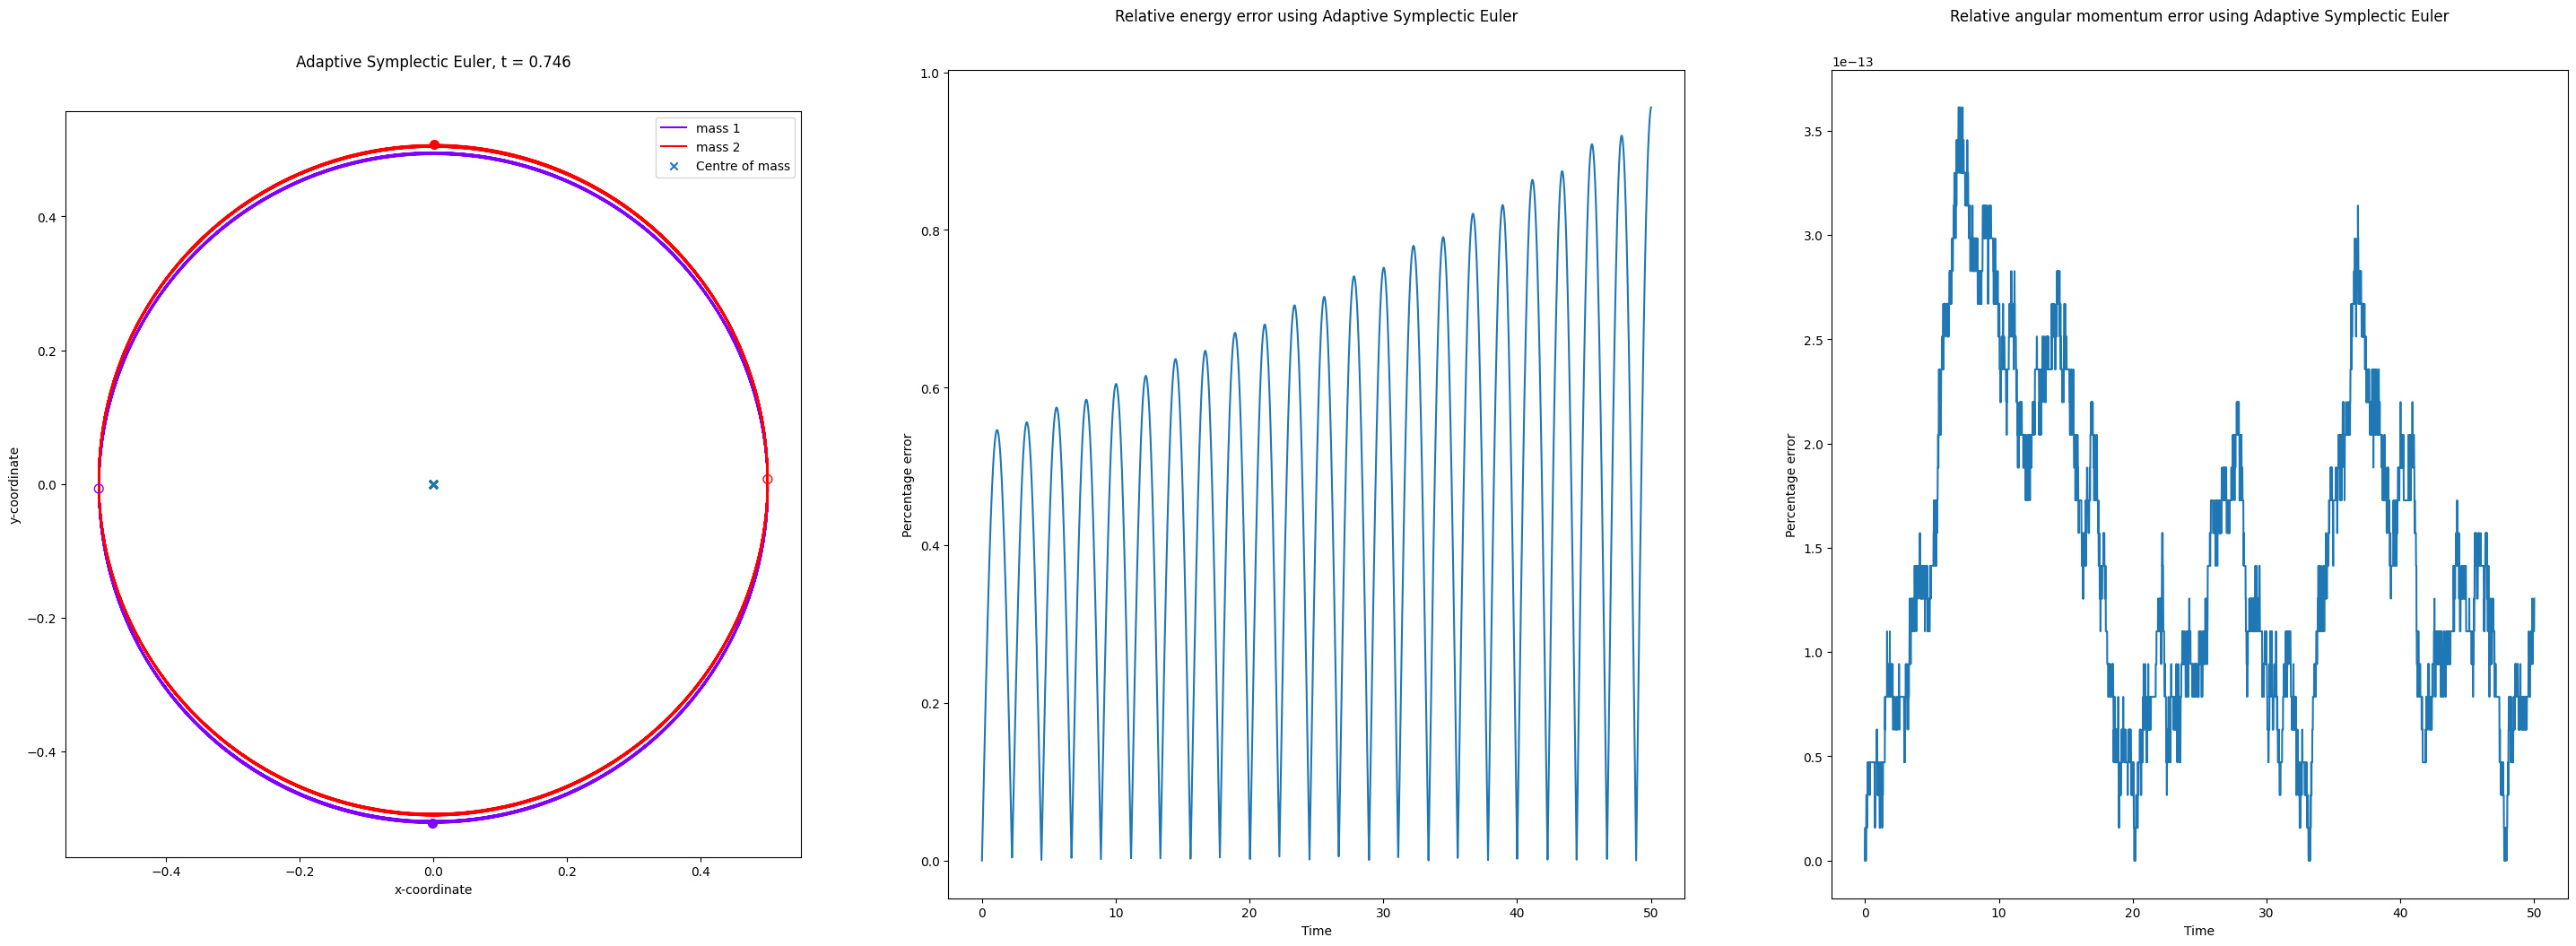

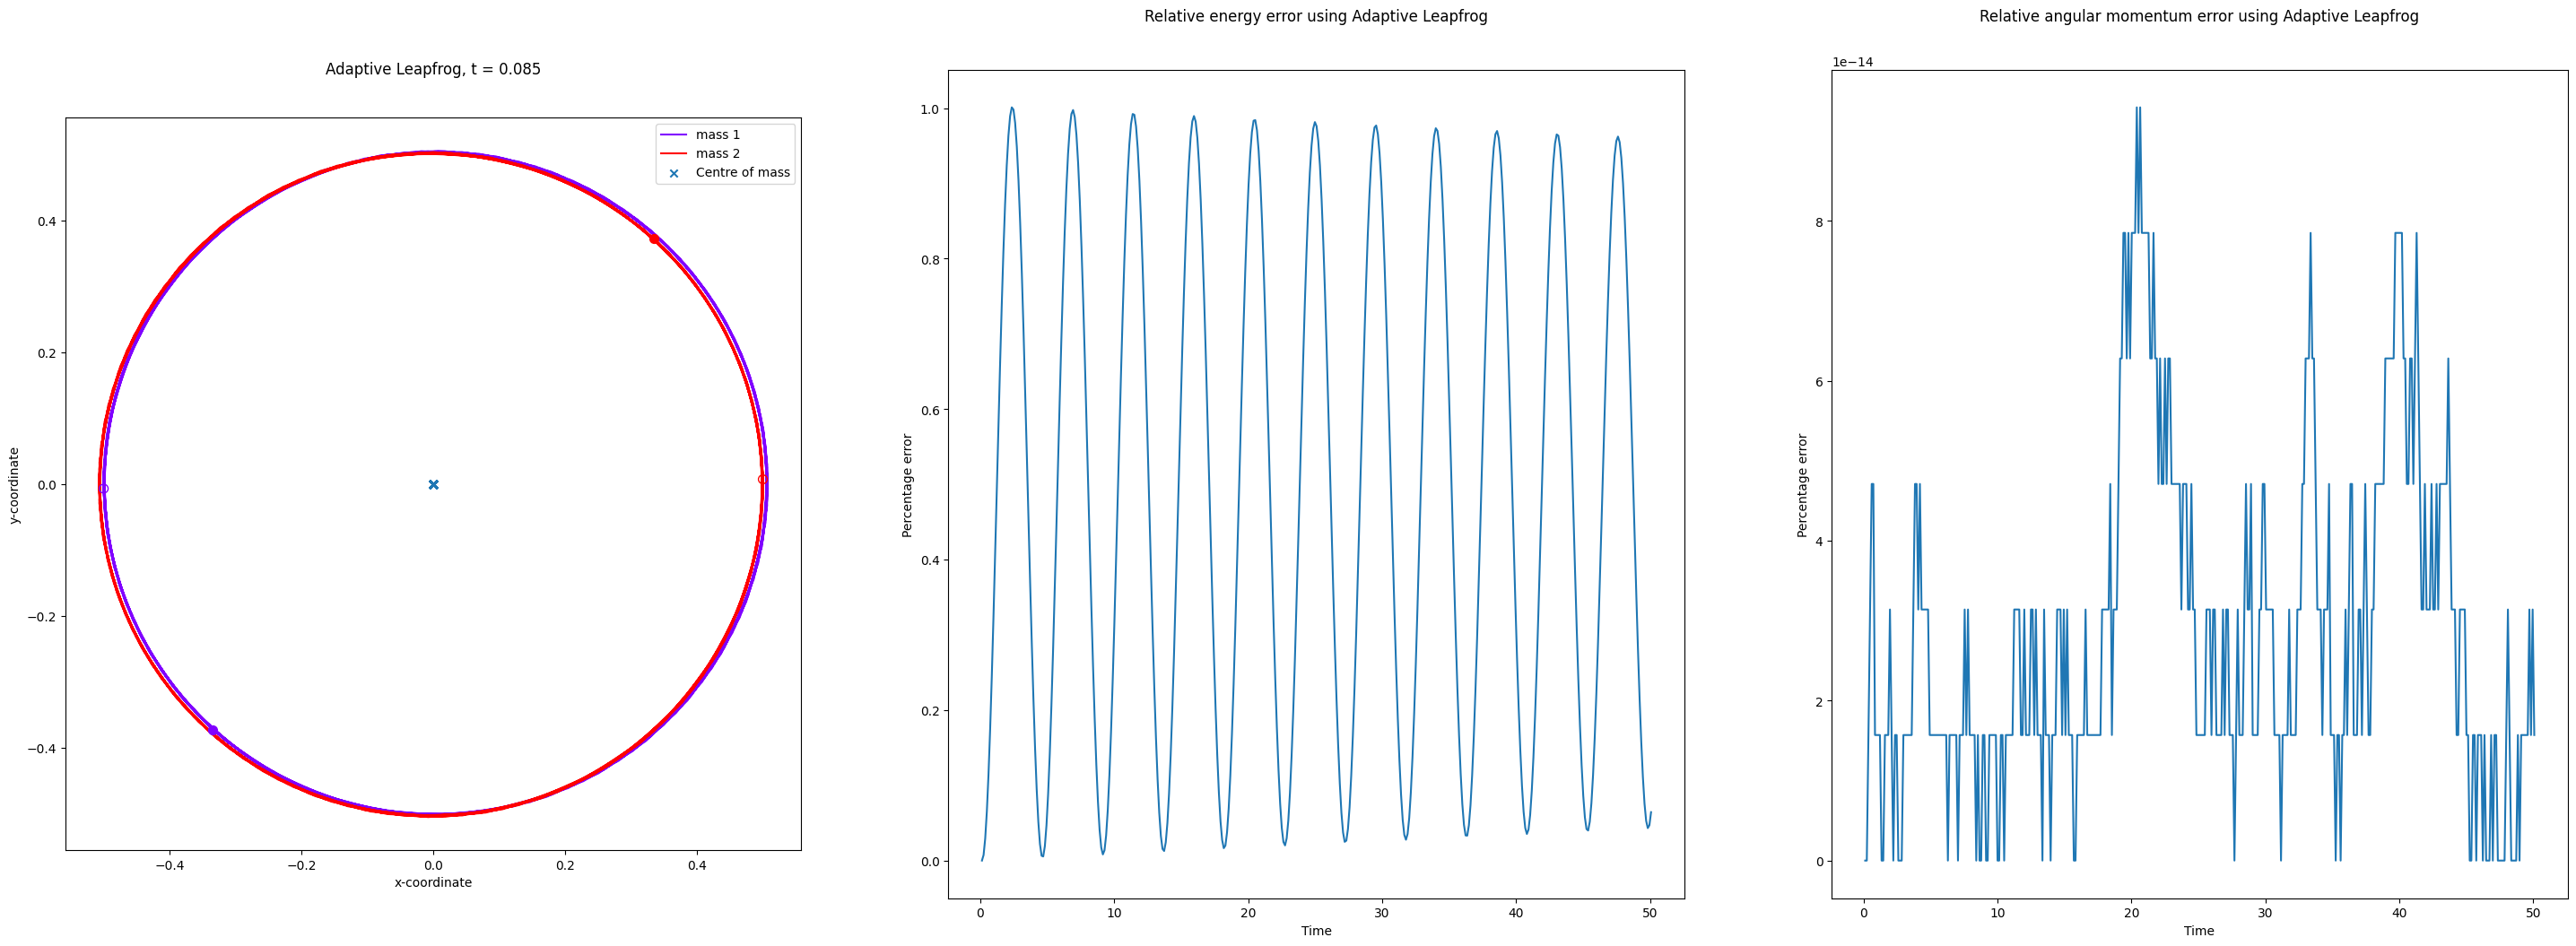

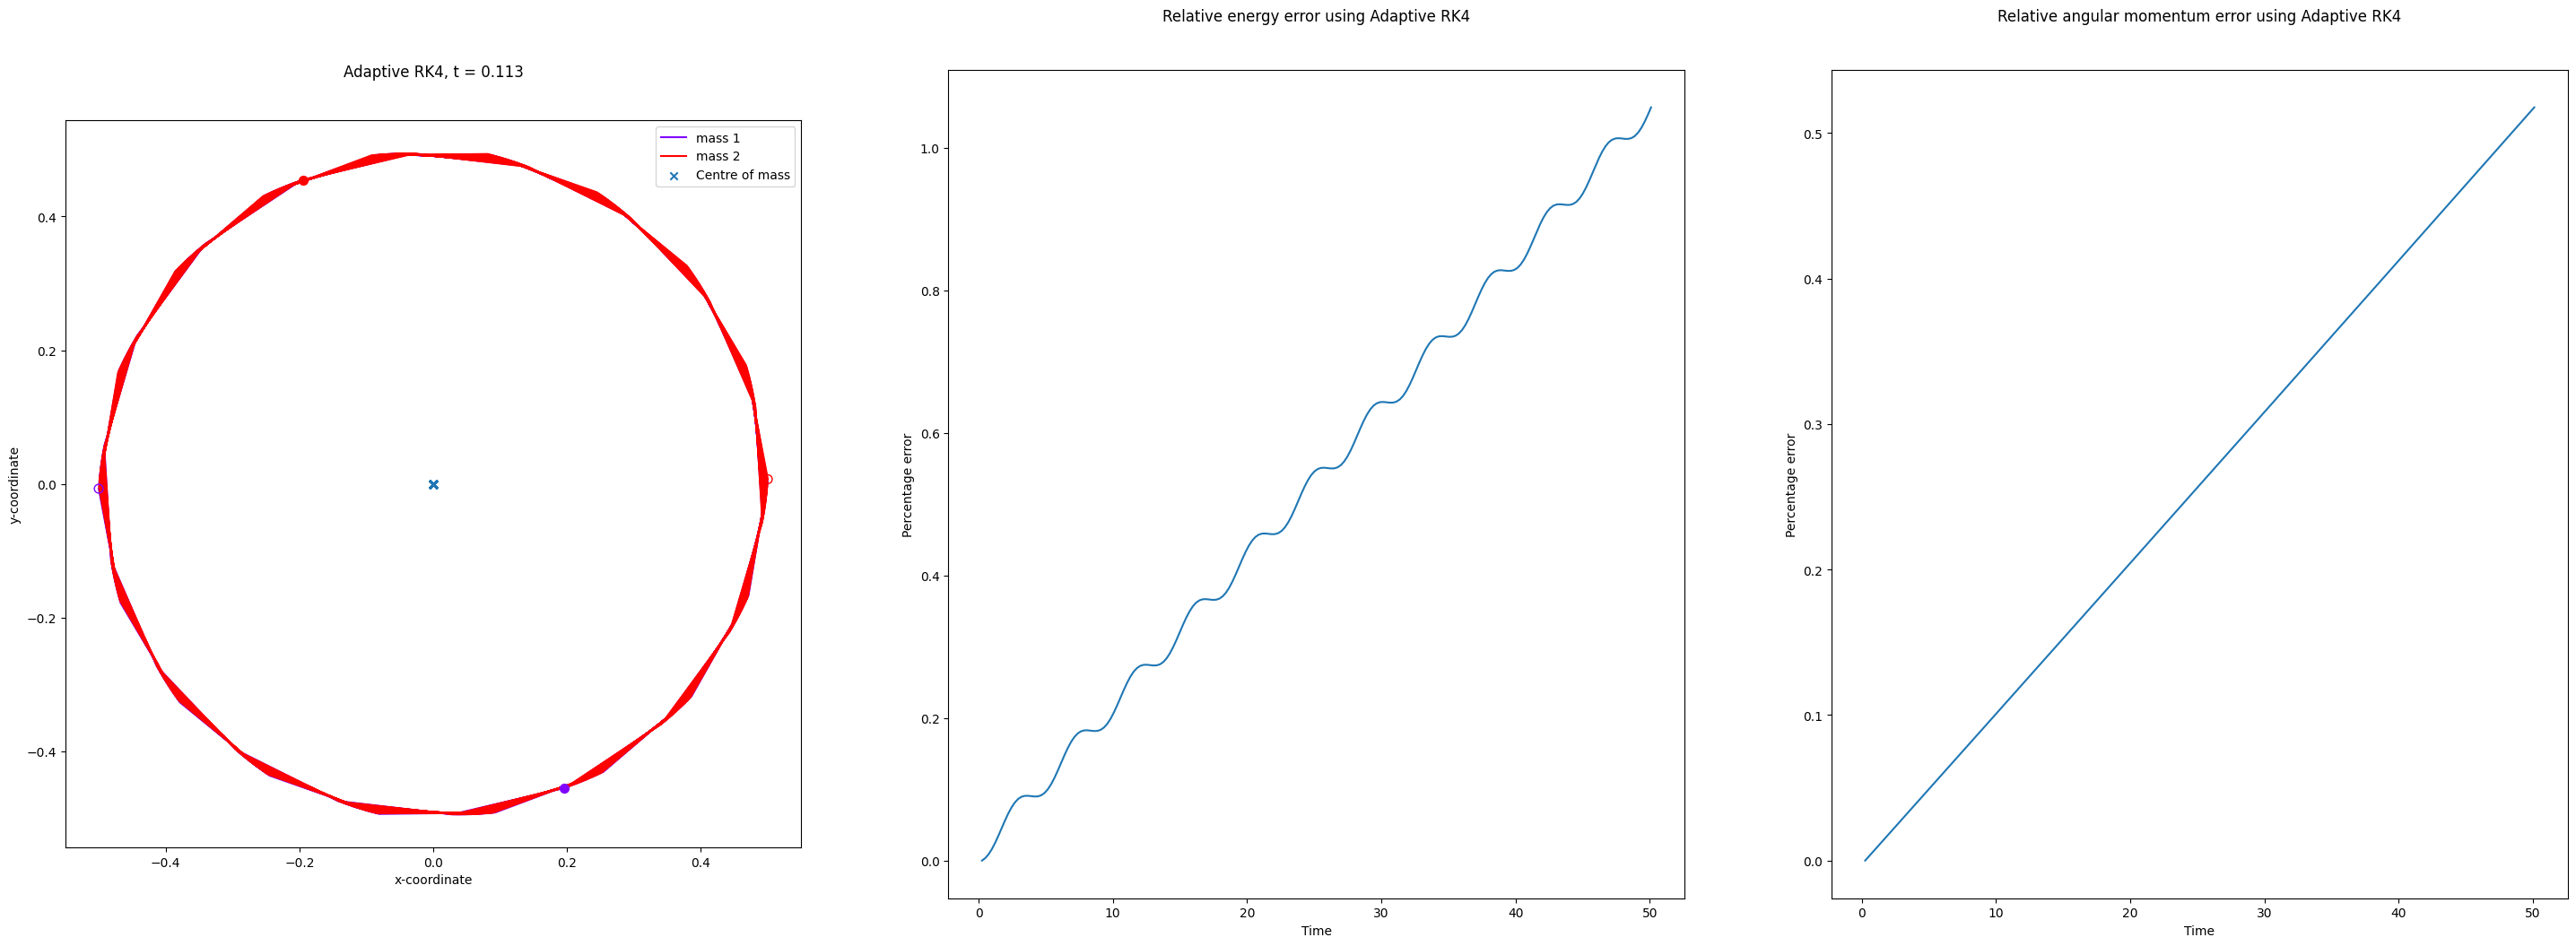

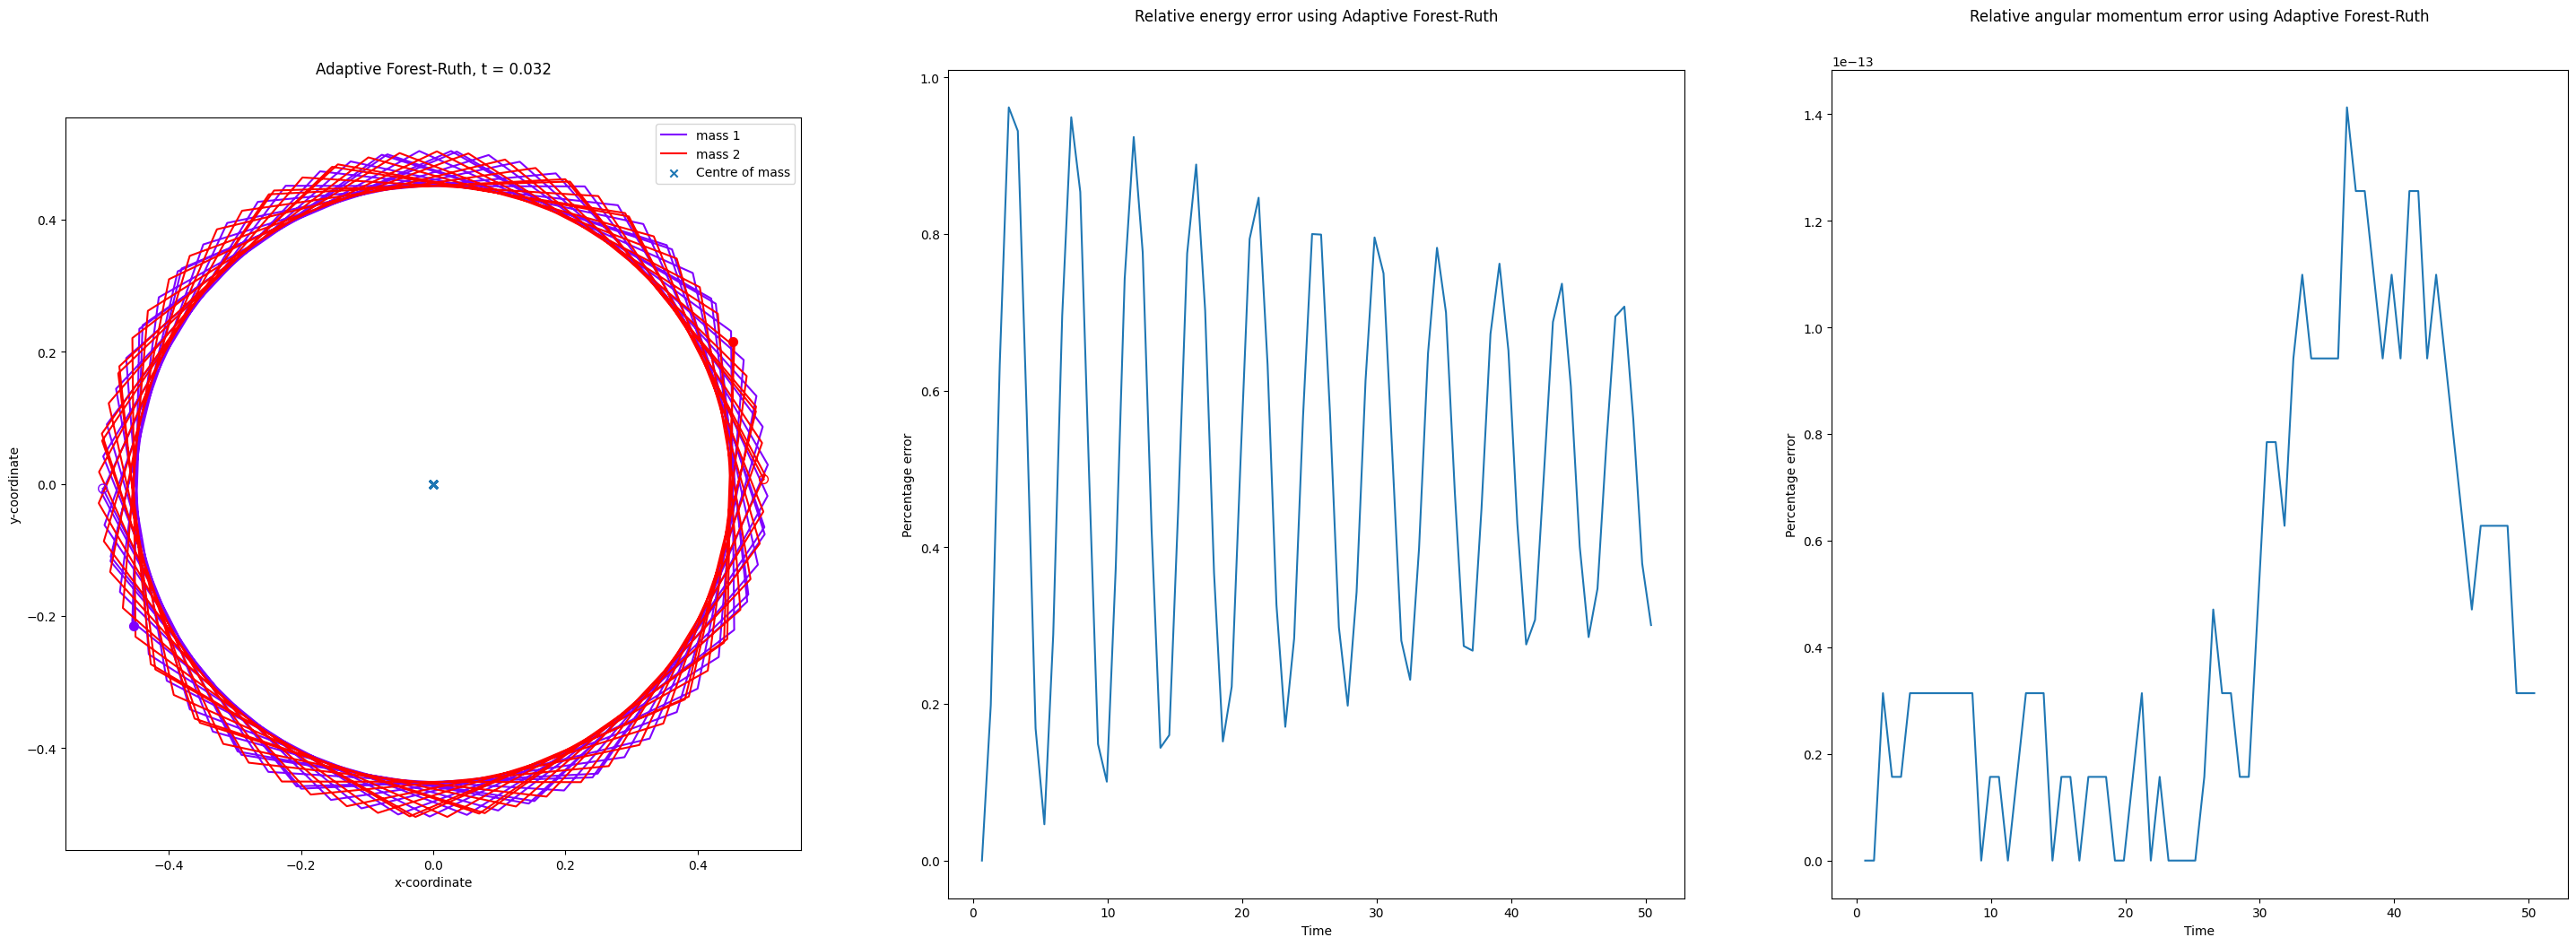

In [104]:
std_Es = []
adapt_Es = []
std_ts = []
adapt_ts = []
all_hs = []
for i, scheme in enumerate(schemes):
    adapt_traj = run_adaptive(scheme, 0, T, h0, r0s, v0s, G, masses, scaleh = scales[i])
    traj = run_scheme(scheme, 0, T, h0, r0s, v0s, G, masses)

    t_adapt = adapt_traj[0]
    t_traj = traj[0]

    std_ts.append(t_traj)
    adapt_ts.append(t_adapt)

    E_adapt = adapt_traj[3]
    E_traj = traj[3]

    rel_E_adapt = RelativeEnergy(E_adapt)
    rel_E_traj = RelativeEnergy(E_traj)

    std_Es.append(rel_E_traj)
    adapt_Es.append(rel_E_adapt)

    hs = [t_adapt[i + 1] - t_adapt[i] for i in range(len(t_adapt)-1)]
    all_hs.append(hs)

    plot2D(adapt_traj, masses, f'Adaptive {names[i]}')


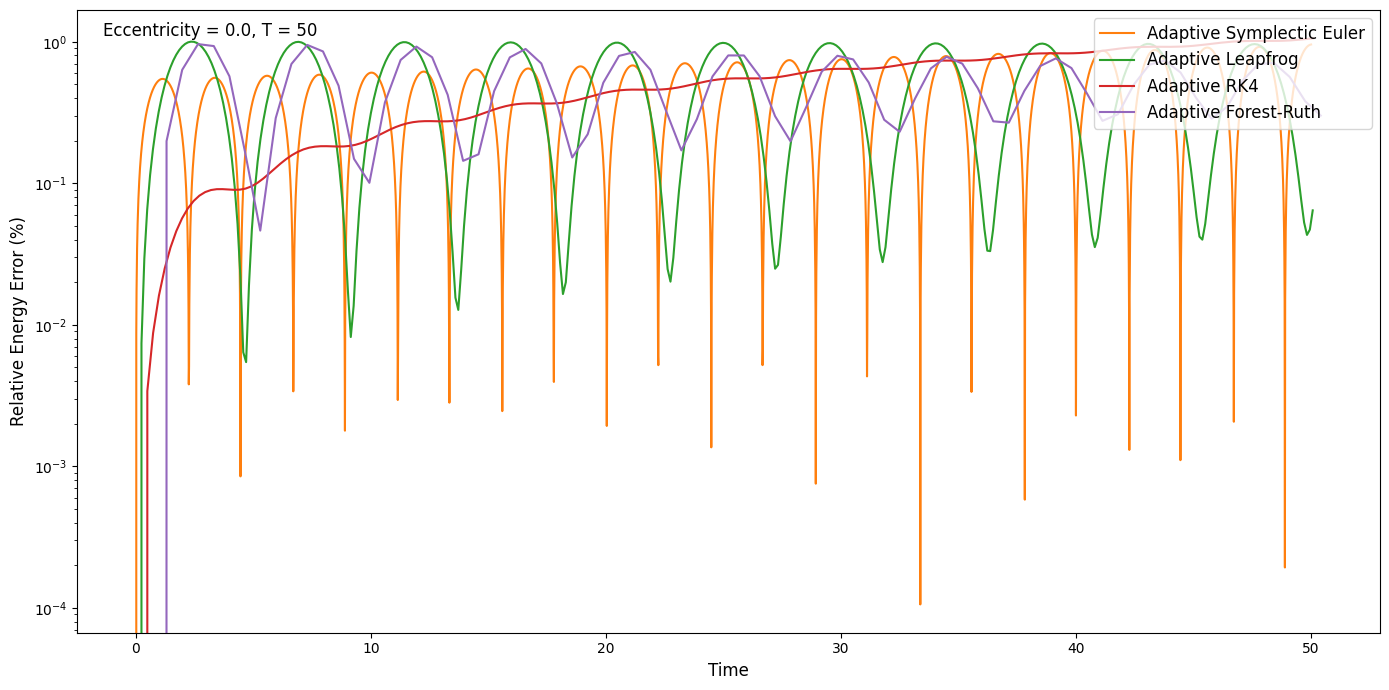

In [102]:
fig, ax = plt.subplots(1,1, figsize = (14,7))

for i, scheme in enumerate(schemes):

    std_E = std_Es[i]
    adapt_E = adapt_Es[i]
    t_std = std_ts[i]
    t_adapt = adapt_ts[i]
   # ax.plot(t_std, std_E, label = names[i], linestyle = 'dashed', color = cols[i])
    ax.plot(t_adapt, adapt_E, label = f'Adaptive {names[i]}', linestyle = 'solid', color = colours[i])

ax.text(0.02, 0.98, f'Eccentricity = {e}, T = {T}', transform=ax.transAxes, 
            va='top', fontsize = 12)
    
ax.set_yscale('log')
ax.set_xlabel('Time', fontsize = 12)
ax.set_ylabel('Relative Energy Error (%)', fontsize = 12)
plt.legend(loc = 'upper right', fontsize=12)
plt.tight_layout()
plt.savefig(f'Plots/Adaptive/Adaptive Energy Comparison, Eccentricity={e}.pdf', format = 'pdf')